In [25]:
import pandas as pd

data = pd.read_csv('data_cleaned.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())

#print(data.head)
data

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,0.98765,0.0,12.50,0,0.561,6.980,89.0,2.0980,3,23.0,396.00,12.00,12.0
487,0.23456,0.0,12.50,0,0.561,6.980,76.0,2.6540,3,23.0,343.00,25.00,32.0
488,0.44433,0.0,12.50,0,0.561,6.123,98.0,2.9870,3,23.0,343.00,21.00,54.0
489,0.77763,0.0,12.70,0,0.561,6.222,34.0,2.5430,3,23.0,343.00,76.00,67.0


Variance: 22.6367, Bias2: 37.1555, Total error: 59.7922
Variance: 18.1447, Bias2: 31.0517, Total error: 49.1965
Variance: 66.1784, Bias2: 122.1551, Total error: 188.3334
Variance: 40.6760, Bias2: 79.3001, Total error: 119.9761
Variance: 39.0729, Bias2: 81.3001, Total error: 120.3731
Variance: 68.5658, Bias2: 102.4709, Total error: 171.0367
Variance: 33.5109, Bias2: 32.2226, Total error: 65.7335
Variance: 43.3102, Bias2: 79.9658, Total error: 123.2760
Total error of the best model: 49.196478510117146
Degree: 1 # of K folds: 8 MSE: 45.49124934499818 

Variance: 22.3323, Bias2: 36.3520, Total error: 58.6843
Variance: 19.5693, Bias2: 30.5616, Total error: 50.1310
Variance: 38.9485, Bias2: 101.6674, Total error: 140.6159
Variance: 27.8927, Bias2: 74.6617, Total error: 102.5545
Variance: 46.8105, Bias2: 88.1425, Total error: 134.9530
Variance: 22.2738, Bias2: 25.6233, Total error: 47.8971
Variance: 80.3803, Bias2: 146.5387, Total error: 226.9190
Variance: 34.8009, Bias2: 50.1797, Total error

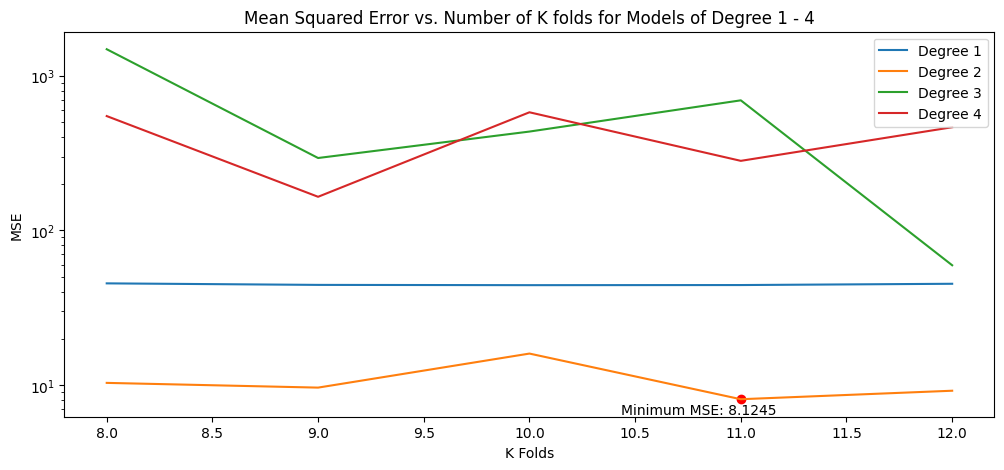

MSE of best model: 8.12451


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

def polynomial_regression(degree, X, y, folds, test_size=0.25, random_state=None):
    # Define number of folds for cross-validation
    kf = KFold(folds)

    # Initialize lists to store results for variance, bias2s, total_error, and models
    variance = []
    bias2s = []
    total_error = []
    models = []
    r2scores = []

    # Set the polynomial degree of the model
    poly_features = PolynomialFeatures(degree)
    X_poly = poly_features.fit_transform(X)

    # Perform cross-validation
    for train_index, test_index in kf.split(X_poly):
        # Split data into training and testing sets for this fold
        X_train, X_test = X_poly[train_index], X_poly[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit polynomial regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate variance, bias, and R^2 for this fold
        variance_test = np.mean((np.mean(y_pred)-model.predict(X_test))**2)
        bias_test = np.mean((np.mean(model.predict(X_test))- y_test) ** 2)
        r2_test = r2_score(y_test, y_pred)

        # Append results to lists
        variance.append(variance_test)
        r2scores.append(r2_test)
        bias2s.append(bias_test)
        total_error.append(variance_test + bias_test)
        models.append(model)

        # Print results for this fold
        print("Variance: {:.4f}, Bias2: {:.4f}, Total error: {:.4f}".format(variance[-1], bias2s[-1], bias2s[-1] + variance[-1]))

    # print the total_error of the best model
    min_error_index = np.argmin(total_error) # returns an index that corresponds to the min value
    best_model = models[min_error_index]

    print("Total error of the best model:", total_error[min_error_index])

    # Testing the final model on the test data
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=test_size, random_state=42)
    
    # Obtain the predictions on the test data
    y_test_pred = best_model.predict(X_test)
        
    # store mse score of the model applied on the test data
    mse = mean_squared_error(y_test, y_test_pred)
    
    return mse , best_model

X = data.drop(columns=["MEDV"])

# Set the target variable 
y = data['MEDV']

# Try degrees from 1 to 5 and in a loop, report mse of the best model trained using k-fold cross validation and print("Degree:", degree, "MSE:", mse)
degrees = range(1, 8)  # Try polynomial degrees from 1 to 5

# Initialize lists to store MSE values for each degree and K fold
mse_values_degree = []

# Range of K fold values to iterate through
K_folds = range(8,13)

for degree in range(1, 5):
    # Initialize list to store MSE values for the current degree
    mse_degree = []
    
    for k in K_folds:
        # Perform polynomial regression with the current degree
        mse, best_model = polynomial_regression(degree, X, y, folds=k)
        
        # Store the MSE value
        mse_degree.append(mse)
        
        # Print the degree and corresponding MSE
        print("Degree:", degree, "# of K folds:", k,  "MSE:", mse,"\n")
    
    # Store the MSE values for the current degree
    mse_values_degree.append(mse_degree)

# Convert the lists to numpy arrays for easier manipulation
mse_values_degree = np.array(mse_values_degree)

# Find the minimum MSE value and its corresponding degree and K fold
min_mse = np.min(mse_values_degree)
min_degree, min_k = np.unravel_index(np.argmin(mse_values_degree), mse_values_degree.shape)

# Adjust min_k to match the start of your K_fold_list
min_k += K_folds[0]

# Create a new figure with the desired size
plt.figure(figsize=(12, 5))

# Plot MSE values for each degree
for i, degree in enumerate(range(1, 5)):
    plt.plot(K_folds, mse_values_degree[i], label=f'Degree {degree}')

# Highlight the point with minimum MSE
plt.scatter(min_k, min_mse, color='red')
plt.annotate(f'Minimum MSE: {min_mse:.4f}', (min_k, min_mse), textcoords="offset points", xytext=(-30,-11), ha='center')

plt.title('Mean Squared Error vs. Number of K folds for Models of Degree 1 - 4')    
plt.xlabel('K Folds')
plt.ylabel('MSE')
plt.legend(loc='upper right')
plt.yscale('log')
plt.show()

print('MSE of best model:', np.round(min_mse,decimals=6))


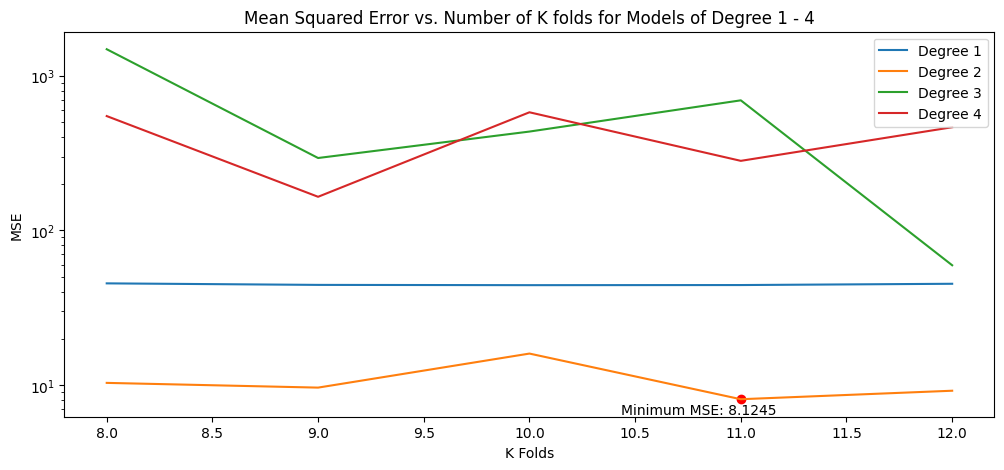

MSE of best model: 8.12451


In [7]:
# Create a new figure with the desired size
plt.figure(figsize=(12, 5))

# Plot MSE values for each degree
for i, degree in enumerate(range(1, 5)):
    plt.plot(K_folds, mse_values_degree[i], label=f'Degree {degree}')

# Highlight the point with minimum MSE
plt.scatter(min_k, min_mse, color='red')
plt.annotate(f'Minimum MSE: {min_mse:.4f}', (min_k, min_mse), textcoords="offset points", xytext=(-30,-11), ha='center')

plt.title('Mean Squared Error vs. Number of K folds for Models of Degree 1 - 4')    
plt.xlabel('K Folds')
plt.ylabel('MSE')
plt.legend(loc='upper right')
plt.yscale('log')
plt.show()

print('MSE of best model:', np.round(min_mse,decimals=6))

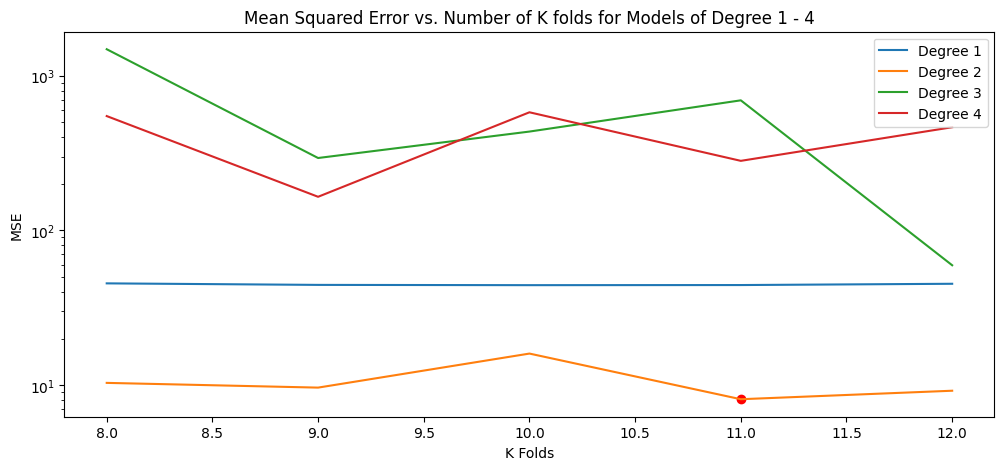

In [8]:
import matplotlib.pyplot as plt

# Create a new figure with the desired size
plt.figure(figsize=(12, 5))

# Plot MSE values for each degree
for i, degree in enumerate(range(1, 5)):
    plt.plot(K_folds, mse_values_degree[i], label=f'Degree {degree}')

# Highlight the point with minimum MSE
plt.scatter(min_k, min_mse, color='red')

plt.title('Mean Squared Error vs. Number of K folds for Models of Degree 1 - 4')
plt.xlabel('K Folds')
plt.ylabel('MSE')
plt.legend(loc='upper right')
plt.yscale('log')
plt.show()

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Try different values for n_estimators
n_estimators_values = range(10, 201, 10)

for n_estimators in n_estimators_values:
    rf_regressor = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf_regressor.fit(X_train, y_train)
    y_pred = rf_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"n_estimators = {n_estimators}: Mean Squared Error = {mse:.2f}: R^2 = {r2:.2f}")

n_estimators = 10: Mean Squared Error = 19.87: R^2 = 0.75
n_estimators = 20: Mean Squared Error = 19.11: R^2 = 0.76
n_estimators = 30: Mean Squared Error = 17.68: R^2 = 0.78
n_estimators = 40: Mean Squared Error = 17.08: R^2 = 0.79
n_estimators = 50: Mean Squared Error = 17.15: R^2 = 0.79
n_estimators = 60: Mean Squared Error = 17.61: R^2 = 0.78
n_estimators = 70: Mean Squared Error = 17.35: R^2 = 0.78
n_estimators = 80: Mean Squared Error = 17.29: R^2 = 0.78
n_estimators = 90: Mean Squared Error = 17.09: R^2 = 0.79
n_estimators = 100: Mean Squared Error = 16.90: R^2 = 0.79
n_estimators = 110: Mean Squared Error = 17.14: R^2 = 0.79
n_estimators = 120: Mean Squared Error = 17.14: R^2 = 0.79
n_estimators = 130: Mean Squared Error = 17.01: R^2 = 0.79
n_estimators = 140: Mean Squared Error = 16.99: R^2 = 0.79
n_estimators = 150: Mean Squared Error = 16.99: R^2 = 0.79
n_estimators = 160: Mean Squared Error = 16.98: R^2 = 0.79
n_estimators = 170: Mean Squared Error = 16.92: R^2 = 0.79
n_esti

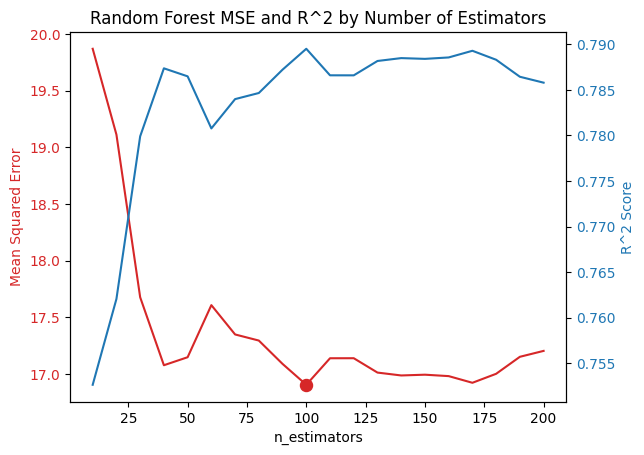

In [16]:
import matplotlib.pyplot as plt

# Lists to store the MSE and R^2 values for each n_estimators
mse_values = []
r2_values = []

# Try different values for n_estimators and store the results
n_estimators_values = range(10, 201, 10)

for n_estimators in n_estimators_values:
    rf_regressor = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf_regressor.fit(X_train, y_train)
    y_pred = rf_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_values.append(mse)
    r2_values.append(r2)

# Find the n_estimators with the lowest MSE
min_mse = min(mse_values)
optimal_n_estimators = n_estimators_values[mse_values.index(min_mse)]

# Plot the results
fig, ax1 = plt.subplots()

# Plotting MSE values
color = 'tab:red'
ax1.set_xlabel('n_estimators')
ax1.set_ylabel('Mean Squared Error', color=color)
ax1.plot(n_estimators_values, mse_values, color=color)
ax1.scatter(optimal_n_estimators, min_mse, color=color, marker='o', s=75)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis to plot R^2 values
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('R^2 Score', color=color)
ax2.plot(n_estimators_values, r2_values, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add a title and show the plot
plt.title('Random Forest MSE and R^2 by Number of Estimators')
plt.show()

In [20]:
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define the RandomForestRegressor with 100 estimators
n_estimators = 100
random_state = 42

# Split the data into training and testing sets (if not already split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

# Fit the RandomForestRegressor model
best_model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
best_model.fit(X_train, y_train)

# Save the best model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)


In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Initialize lists to store data
combined_scores = []

for degree in range(1, 5):
    for n_splits in range(5, 13):
        # Initialize K-Fold cross-validator
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

        fold_mse_scores = []
        fold_r2_scores = []
        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Create polynomial features
            poly = PolynomialFeatures(degree=degree)
            X_train_poly = poly.fit_transform(X_train)
            X_test_poly = poly.transform(X_test)

            # Fit a linear regression model
            model = LinearRegression()
            model.fit(X_train_poly, y_train)

            # Make predictions
            y_pred = model.predict(X_test_poly)

            # Calculate Mean Squared Error (MSE)
            mse = mean_squared_error(y_test, y_pred)
            fold_mse_scores.append(mse)

            # Calculate R2 score
            r2 = r2_score(y_test, y_pred)
            fold_r2_scores.append(r2)

        # Calculate average MSE and R2 across folds for this combination
        average_mse = np.mean(fold_mse_scores)
        average_r2 = np.mean(fold_r2_scores)
        combined_scores.append((degree, n_splits, np.round(average_mse, 6), np.round(average_r2, 6)))

# Create a Pandas DataFrame
table = pd.DataFrame(combined_scores, columns=["degree", "folds", "mse", "r2"])

# Display the combined DataFrame
print(table)
table.to_csv('kfoldstable.csv', index=False)


    degree  folds           mse            r2
0        1      5  4.327308e+01      0.556015
1        1      6  4.405266e+01      0.528629
2        1      7  4.318468e+01      0.535147
3        1      8  4.326791e+01      0.541670
4        1      9  4.320002e+01      0.530279
5        1     10  4.328442e+01      0.565221
6        1     11  4.243232e+01      0.555494
7        1     12  4.344481e+01      0.567593
8        2      5  4.492050e+01      0.538384
9        2      6  3.784894e+01      0.563027
10       2      7  2.796206e+01      0.688607
11       2      8  3.132741e+01      0.648528
12       2      9  2.888776e+01      0.662653
13       2     10  2.818027e+01      0.696613
14       2     11  2.738973e+01      0.700704
15       2     12  2.763944e+01      0.693835
16       3      5  8.825780e+05  -9699.122184
17       3      6  5.660948e+04   -662.887983
18       3      7  6.634118e+03    -73.981525
19       3      8  6.464594e+03    -66.861647
20       3      9  3.132896e+03   

In [27]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('data_cleaned.csv')

# select target (y) and features (X)
X = data.drop(columns=["MEDV"])
y = data['MEDV']

# scale X value
scalar = StandardScaler()
X_scaled = pd.DataFrame(scalar.fit_transform(X))

# Function to create the model
def create_model(dropout_rate=0.0, num_hidden_layers=1, neurons_per_layer=30, activation='relu'):
    model = tf.keras.Sequential()
    # Input layer
    model.add(tf.keras.layers.Dense(neurons_per_layer, activation=activation, input_shape=(X_train.shape[1],)))

    # Hidden layers
    for _ in range(num_hidden_layers - 1):
        model.add(tf.keras.layers.Dense(neurons_per_layer, activation=activation))

    # Dropout layer
    model.add(tf.keras.layers.Dropout(dropout_rate))

    # Output layer
    model.add(tf.keras.layers.Dense(1, activation='relu'))

    # Compile the model
    model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

    return model

# Create the model
best_model = create_model()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model
best_model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=0)

# Evaluate the model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Save the model
best_model.save('ANN.h5')

c:\Users\brien\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


Mean Squared Error: 17.248292203578007


In [26]:
from sklearn.preprocessing import StandardScaler
import pickle

# Assuming X_train is your training data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)